<a href="https://colab.research.google.com/github/sha-shank469/UAV_Detection/blob/main/Drone_Detection/UAV_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imported Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#here we have imported our configuration and weight file of yolov3
yolo = cv2.dnn.readNet("./yolo-drone.weights", "./yolo-drone.cfg")


In [ ]:
# so our algorithm is capable of detecting as many things with our pretrained models here eg.drones
#here we are importing these pretrained weight in the list"classes"
classes = []
with open("./drone.names", 'r') as f:
    classes = f.read().splitlines()

In [ ]:
#this part will give the number of item in the list class
len(classes)

1

In [ ]:
#here we are reading the image.it is originally in bgr format and we are converting to rgb format.
img = cv2.imread("./Drone9.jpeg")
height,width, _ = img.shape
#if the image is huge for that here we are defining the shape.
blob  = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

In [ ]:
blob.shape

(1, 3, 320, 320)

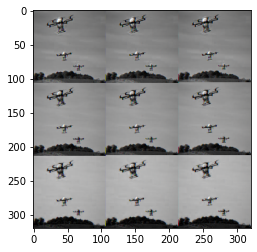

In [ ]:
# to print img 
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [ ]:
#now this blob is our input image.
yolo.setInput(blob)

In [ ]:
#here we are defining the output layer 
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [ ]:
#here we are getting by what confidence prediction is done.
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    #here by detection we are going to get the list and the score store the place or where the maximum probability of image is found.
    #class_id store the percentage of that probability
    score = detection [5:]
    class_id = np.argmax(score)
    # for multiple bounding boxes we have confidence, here we are setting threshold and if 
    #confidence is greater than that we will extract our feature.
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
#here we are getting the number of bounding boxes in the image.
len(boxes)

3

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes), 3))

In [ ]:
#creating bounding box dimension according to image
for i in indexes.flatten():
  x,y,w,h = boxes[i] 

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i] 

  cv2.rectangle(img,(x,y),(x+w,y+h),color,7)
  cv2.putText(img,label +" "+ confi,(x,y+20),font,2,(255,255,255),1)

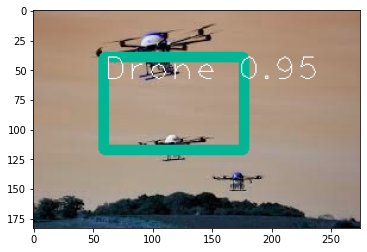

In [ ]:
#output of image detecting drone in the bounding box.
plt.imshow(img)

In [ ]:
#storing the image in colab 
cv2.imwrite("./img3.jpg",img)

True